# Bank Term Deposit Analysis

In [266]:
#load libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [267]:
#load data
data = pd.read_csv('C:\\Users\\CHINNI\\Downloads\\Bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [268]:
#describe the data
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [269]:
#check data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [270]:
#checking if there are null values
data.isnull().count()

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
y            45211
dtype: int64

In [271]:
#Data Exploration
#checking the count of the outcome values
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

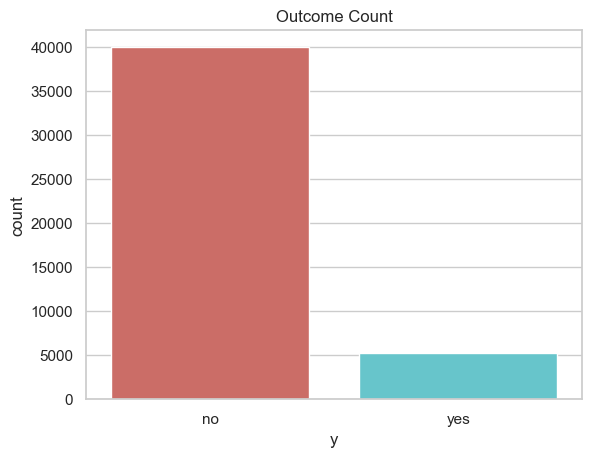

In [272]:
#plot the outcome (y)
sns.countplot(x='y', data = data, palette = 'hls')
plt.title('Outcome Count')
plt.show()

In [273]:
data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


Text(0, 0.5, 'Frequency of Purchase')

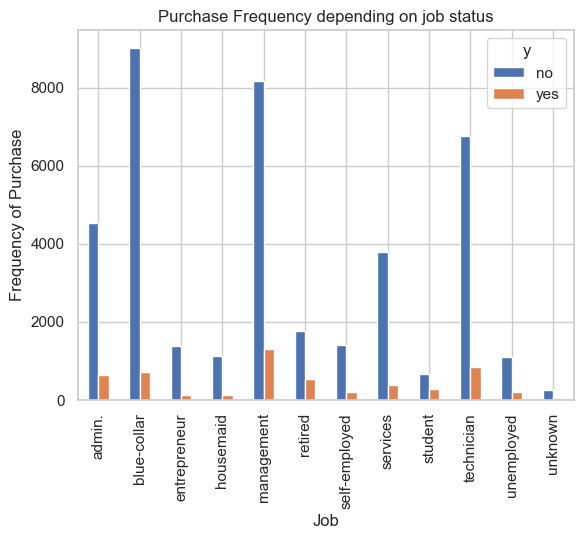

In [274]:
#frequency of purchase according to job status
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency depending on job status')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Proportion of Customers')

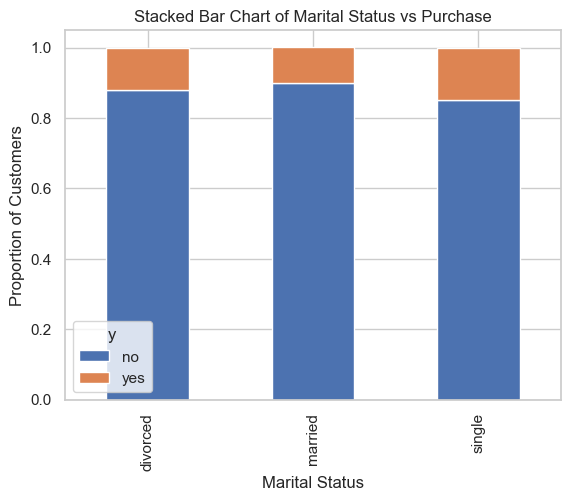

In [275]:
#visualize marital status and Subscription status
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Frequency of Purchase')

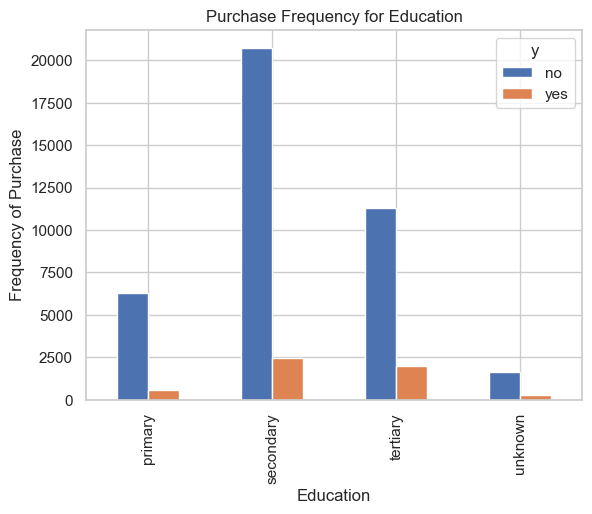

In [276]:
#frequency of purchase per education
pd.crosstab(data.education,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Education')
plt.xlabel('Education')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency of Purchase')

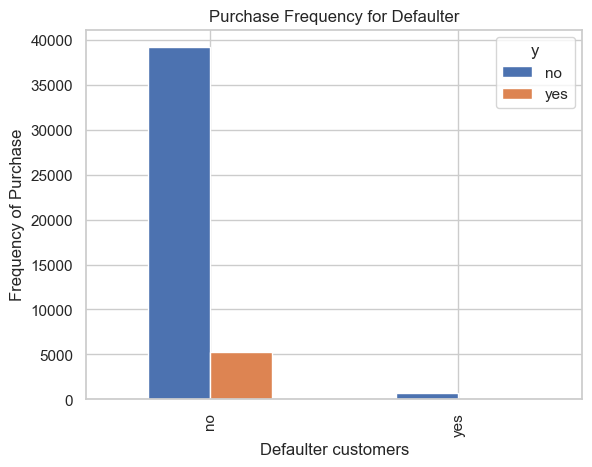

In [277]:
#frequency of purchase per defaulter
pd.crosstab(data.default,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Defaulter')
plt.xlabel('Defaulter customers')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency of Purchase')

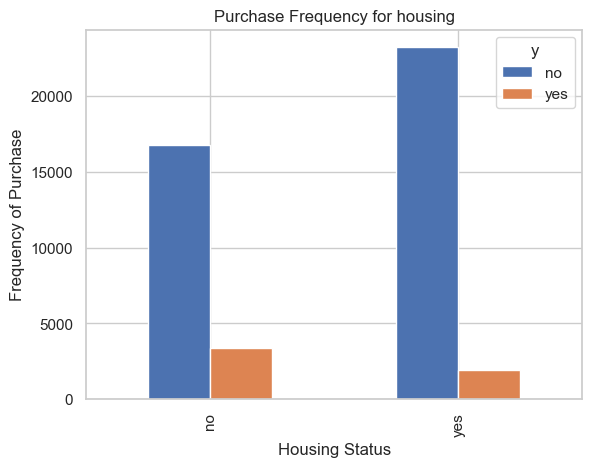

In [278]:
#frequency of purchase per Housing status
pd.crosstab(data.housing,data.y).plot(kind='bar')
plt.title('Purchase Frequency for housing')
plt.xlabel('Housing Status')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency of Purchase')

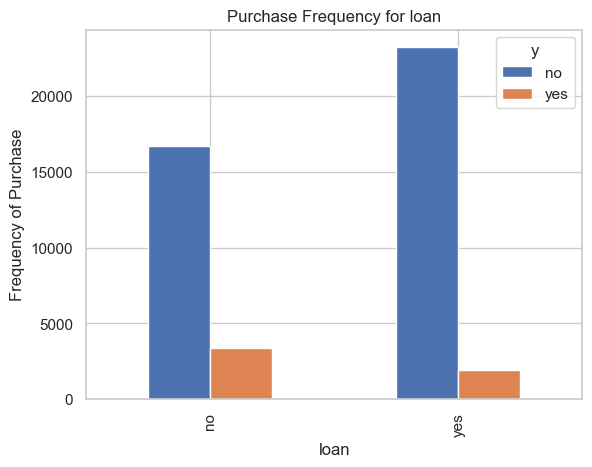

In [279]:
#frequency of purchase per loan
pd.crosstab(data.housing,data.y).plot(kind='bar')
plt.title('Purchase Frequency for loan')
plt.xlabel('loan')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency of Purchase')

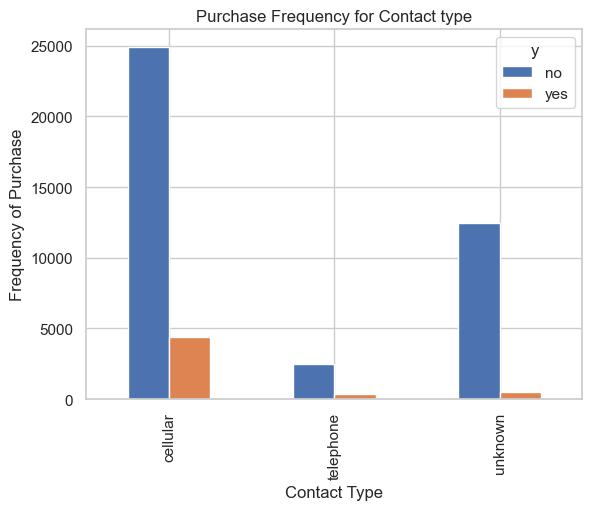

In [280]:
#frequency of purchase per contact type
pd.crosstab(data.contact,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Contact type')
plt.xlabel('Contact Type')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency of Purchase')

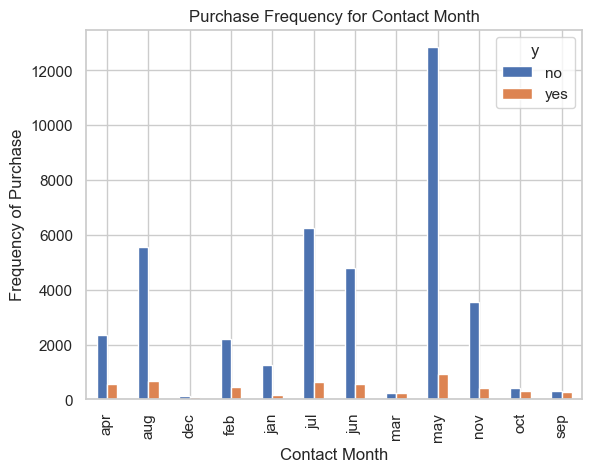

In [281]:
#frequency of purchase per caontact month
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Contact Month')
plt.xlabel('Contact Month')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency of Purchase')

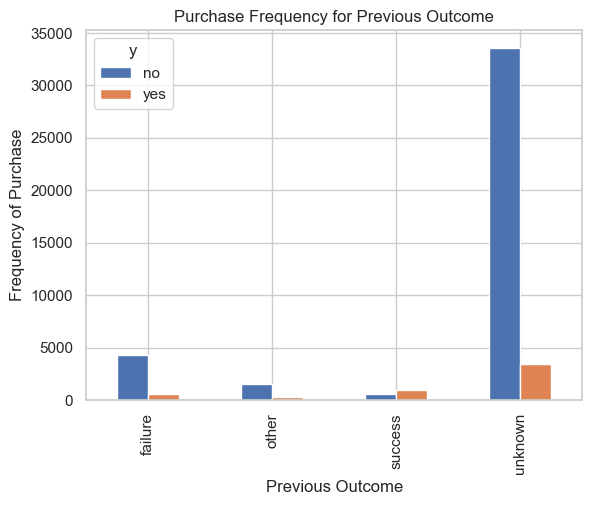

In [282]:
#frequency of purchase per previous outcome
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Previous Outcome')
plt.xlabel('Previous Outcome')
plt.ylabel('Frequency of Purchase')

Text(0.5, 1.05, 'Correlation matrix of features')

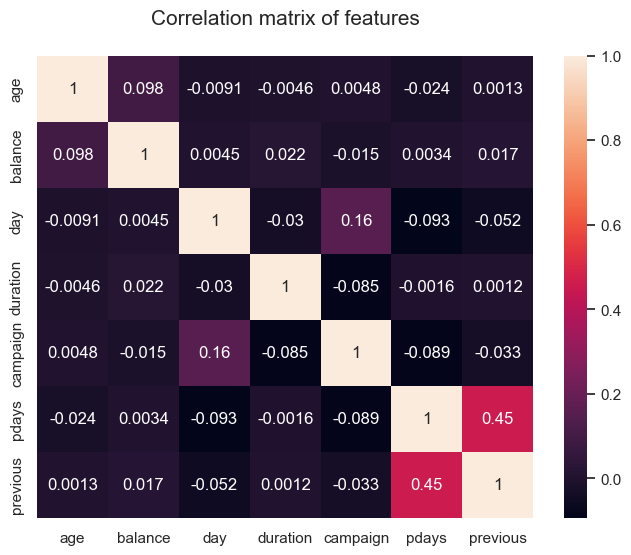

In [283]:
#Correlation matrix
correlation_matrix = data.corr()
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(correlation_matrix, ax=ax, annot=True)
plt.title("Correlation matrix of features", y=1.05, size=15)

In [236]:
#creating dummy variables

cat_vars = ['job','marital','education','default','housing','loan','contact','month','poutcome']
for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1 = data.join(cat_list)
    data = data1
cat_vars = ['job','marital','education','default','housing','loan','contact','month','poutcome']
data_vars = data.columns.values.tolist()
dt = [i for i in data_vars if i not in cat_vars]

In [237]:
data_final=data[dt]
Columns = data_final.columns.values
print(Columns)

['age' 'balance' 'day' 'duration' 'campaign' 'pdays' 'previous' 'y'
 'job_admin.' 'job_blue-collar' 'job_entrepreneur' 'job_housemaid'
 'job_management' 'job_retired' 'job_self-employed' 'job_services'
 'job_student' 'job_technician' 'job_unemployed' 'job_unknown'
 'marital_divorced' 'marital_married' 'marital_single' 'education_primary'
 'education_secondary' 'education_tertiary' 'education_unknown'
 'default_no' 'default_yes' 'housing_no' 'housing_yes' 'loan_no'
 'loan_yes' 'contact_cellular' 'contact_telephone' 'contact_unknown'
 'month_apr' 'month_aug' 'month_dec' 'month_feb' 'month_jan' 'month_jul'
 'month_jun' 'month_mar' 'month_may' 'month_nov' 'month_oct' 'month_sep'
 'poutcome_failure' 'poutcome_other' 'poutcome_success' 'poutcome_unknown']


In [238]:
#using SMOTE to do oversampling
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

In [239]:
#recursive feature elimination
from sklearn.feature_selection import RFE
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_, sep="\t")
print(rfe.ranking_, sep="\t")

C:\Users\CHINNI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\CHINNI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\CHINNI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\CHINNI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[False False False False False False False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False  True  True False  True  True  True  True False
 False False False False False False False False False False False False
 False False False]
[23 27 24 25 21 26 22  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 19 20  1  1  2  1  1  1  1 12  7 14 10  6  9 13 17 11  8 15 16  4
  5 18  3]


C:\Users\CHINNI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [240]:
#use the selected columns

columns =['job_blue-collar', 'job_housemaid', 'default_no',
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"]

X=os_data_X[columns]
y=os_data_y['y']

# Generalised Logistic Regression

In [251]:
#fitting Genelarized Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [252]:
# Get the predictions for the training set
y_train_pred = logreg.predict(X_train)

# Calculate the accuracy
accuracy = metrics.accuracy_score(y_train, y_train_pred)

# Print the accuracy
print(f"Training accuracy: {accuracy: .4f}")

Training accuracy:  0.8559


In [253]:
#predicting using the test set
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


[Text(0.5, 1.0, 'Important features to predict Subscription')]

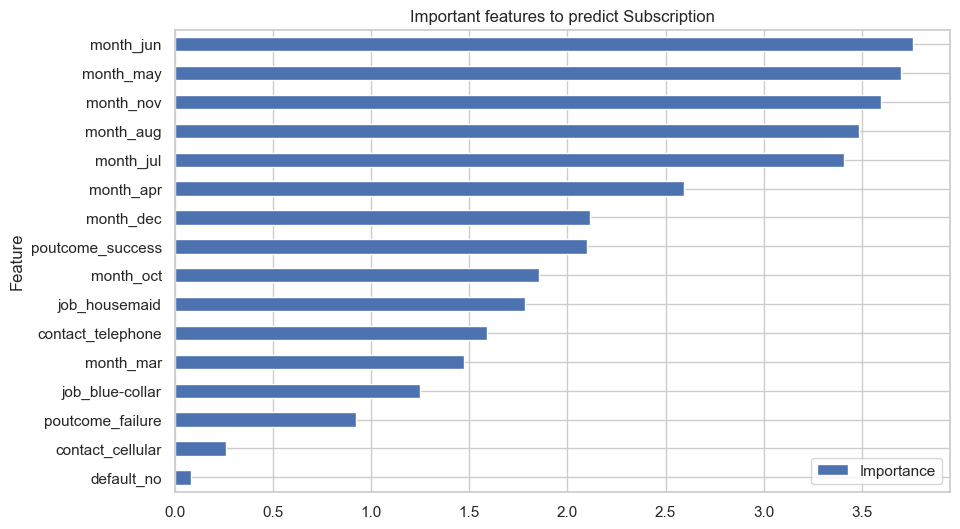

In [254]:
coefficients = logreg.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6)).set(title='Important features to predict Subscription')

In [260]:
#confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7518  850]
 [1453 6951]]


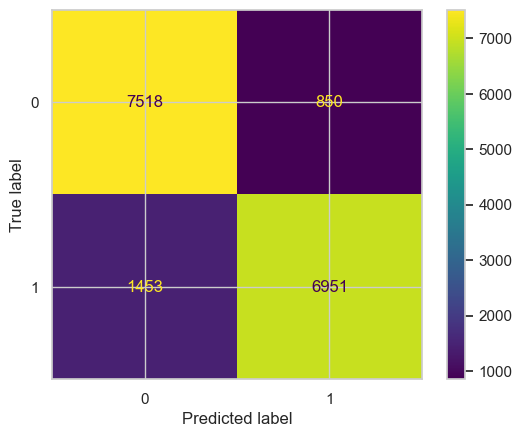

In [261]:
labels = [0,1]
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=labels)
disp.plot();

In [262]:
#checking the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.84      0.90      0.87      8368
         yes       0.89      0.83      0.86      8404

    accuracy                           0.86     16772
   macro avg       0.86      0.86      0.86     16772
weighted avg       0.86      0.86      0.86     16772



# Support Vector Machines

In [263]:
from sklearn import svm
clf = svm.SVC()

In [264]:
#Training the dataset
clf.fit(X, y)

#accuracy score
Score = clf.score(X, y)
print("Training set Score:", Score)

Training set Score: 0.8619647265052052


In [125]:
#predicting using the test set
y_pred1 = clf.predict(X_test)

In [126]:
#accuracy of SVM
metrics.accuracy_score(y_test, y_pred1)

0.8645957548294777

In [127]:
#checking the classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

          no       0.84      0.90      0.87      8368
         yes       0.90      0.83      0.86      8404

    accuracy                           0.86     16772
   macro avg       0.87      0.86      0.86     16772
weighted avg       0.87      0.86      0.86     16772



[[7553  815]
 [1456 6948]]


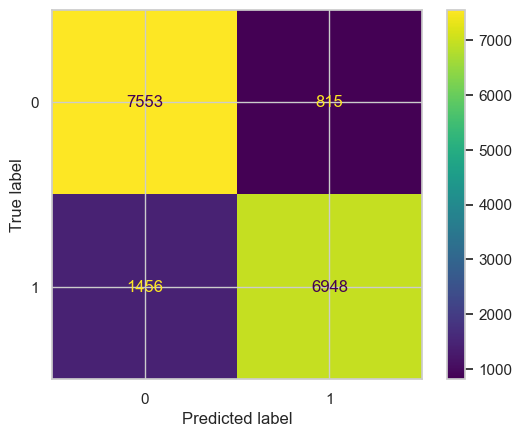

In [130]:
#confusion matrix
confusion_clf = confusion_matrix(y_test, y_pred1)
print(confusion_clf)

labels = [0,1]
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_clf, display_labels=labels)
disp.plot();

# Optimized K-Nearest Neighbours

In [152]:
from sklearn.neighbors import KNeighborsClassifier

#Train Model first KNN
k = 3  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

C:\Users\CHINNI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\CHINNI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

Minimum error:- 0.1383854042451705 at K = 6


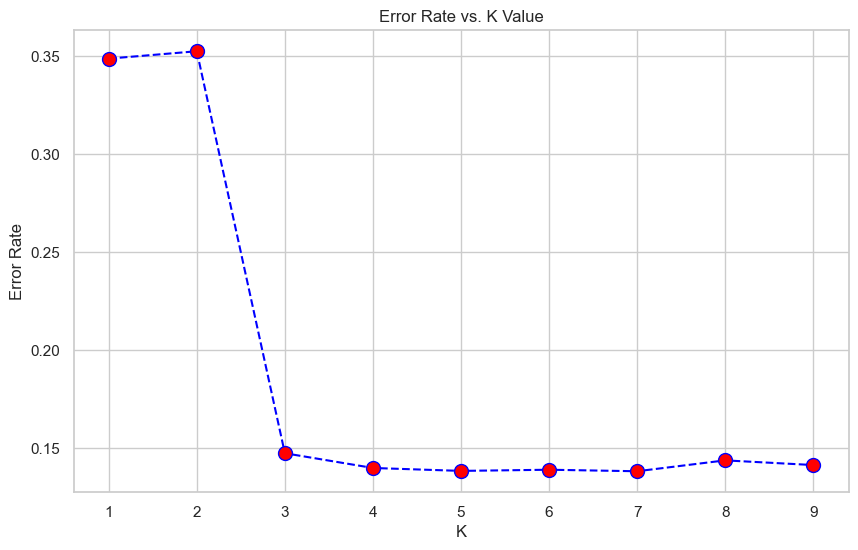

In [153]:
#optimizing KNN
error_rate = []
for i in range(1,10):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [161]:
#k = 3
k = 3
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

#training accuracy
training_score = neigh.score(X_train, y_train)
print('Training accuracy:', training_score)

C:\Users\CHINNI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Training accuracy: 0.8502325343690909


In [162]:
#predictions
y_pred2 = neigh.predict(X_test)

#KNN accuracy
print("Accuracy of model at K=3 is",metrics.accuracy_score(y_test, y_pred2))

C:\Users\CHINNI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy of model at K=3 is 0.852432625804913


In [163]:
#checking the classification report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

          no       0.84      0.87      0.85      8368
         yes       0.86      0.84      0.85      8404

    accuracy                           0.85     16772
   macro avg       0.85      0.85      0.85     16772
weighted avg       0.85      0.85      0.85     16772



[[7262 1106]
 [1369 7035]]


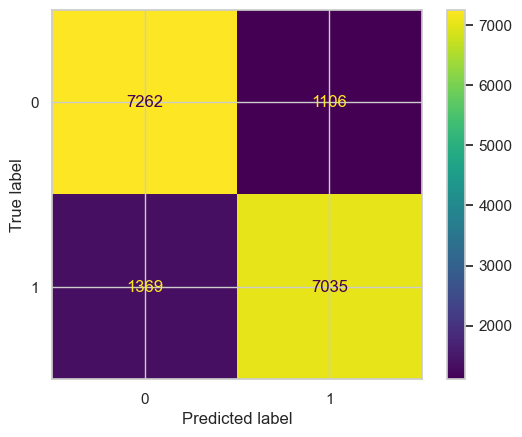

In [164]:
#confusion matrix
confusion_knn = confusion_matrix(y_test, y_pred2)
print(confusion_knn)

labels = [0,1]
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_knn, display_labels=labels)
disp.plot();

# Bayesian Classifier

In [165]:
#building the model
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

GaussianNB()

In [169]:
# Model training
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
print('Training accuracy:', training_score)

Training accuracy: 0.8491848520468135


In [171]:
#predict
y_pred3 = model.predict(X_test)

#Bayesian accuracy
print("Accuracy of model is",metrics.accuracy_score(y_test, y_pred3))

Accuracy of model is 0.8499284521822085


In [172]:
#checking the classification report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

          no       0.81      0.92      0.86      8368
         yes       0.91      0.78      0.84      8404

    accuracy                           0.85     16772
   macro avg       0.86      0.85      0.85     16772
weighted avg       0.86      0.85      0.85     16772



[[7553  815]
 [1456 6948]]


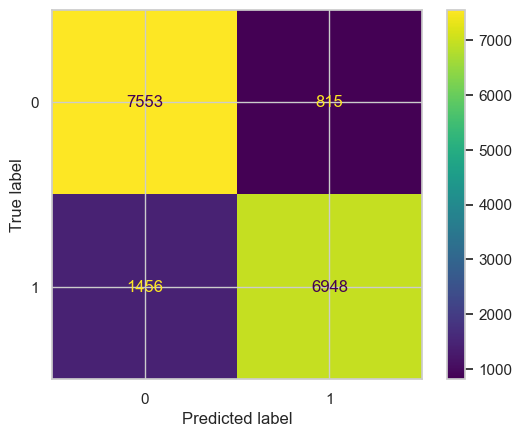

In [173]:
#confusion matrix
confusion_NB = confusion_matrix(y_test, y_pred1)
print(confusion_NB)

labels = [0,1]
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_NB, display_labels=labels)
disp.plot();

In [ ]:
Reference List:
    Moro,S., Rita,P., and Cortez,P.. (2012). Bank Marketing. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.